# RoboGarden Bootcamp Week 3 Use Case - KC Housing Data

In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Import dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

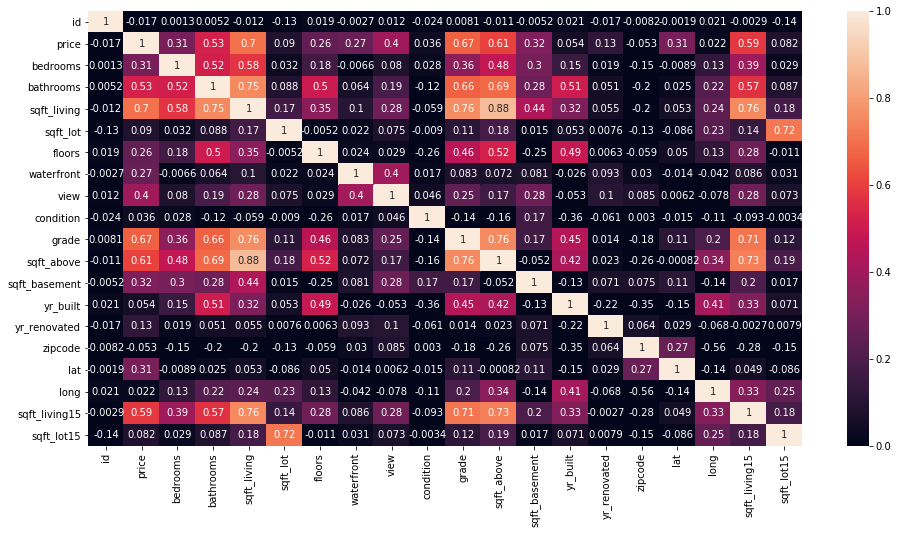

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.heatmap(df.corr(), annot=True, ax = ax, vmin = 0, vmax = 1)

In [5]:
df[['sqft_living','sqft_living15','sqft_above', 'sqft_basement','yr_renovated']].head(10)

,sqft_living,sqft_living15,sqft_above,sqft_basement,yr_renovated
0,1180,1340,1180,0,0
1,2570,1690,2170,400,1991
2,770,2720,770,0,0
3,1960,1360,1050,910,0
4,1680,1800,1680,0,0
5,5420,4760,3890,1530,0
6,1715,2238,1715,0,0
7,1060,1650,1060,0,0
8,1780,1780,1050,730,0
9,1890,2390,1890,0,0


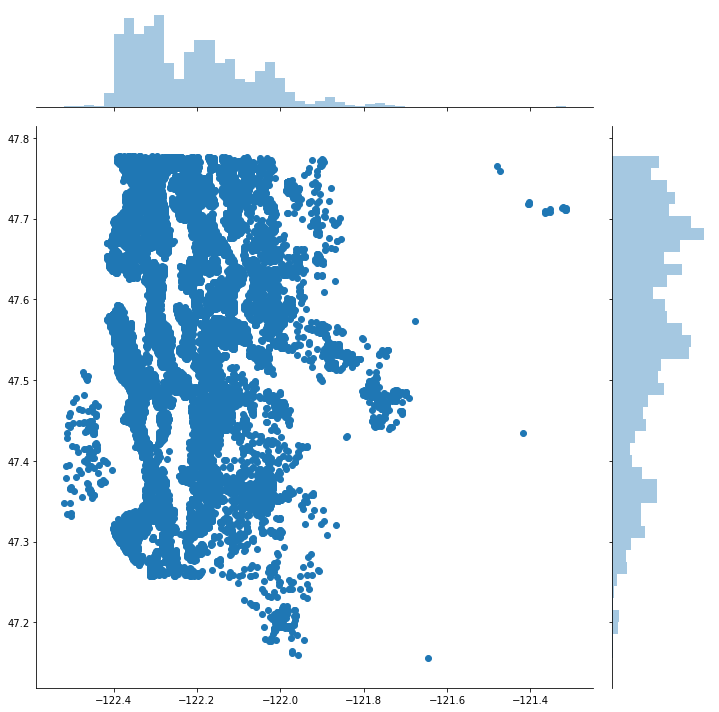

In [6]:
#PLot lat & long 
sns.jointplot(x=df.long.values, y=df.lat.values, size = 10)
#sns.jointplot(x=df.lat.values, y=df.long.values, height = 10) <-- use in newer environment

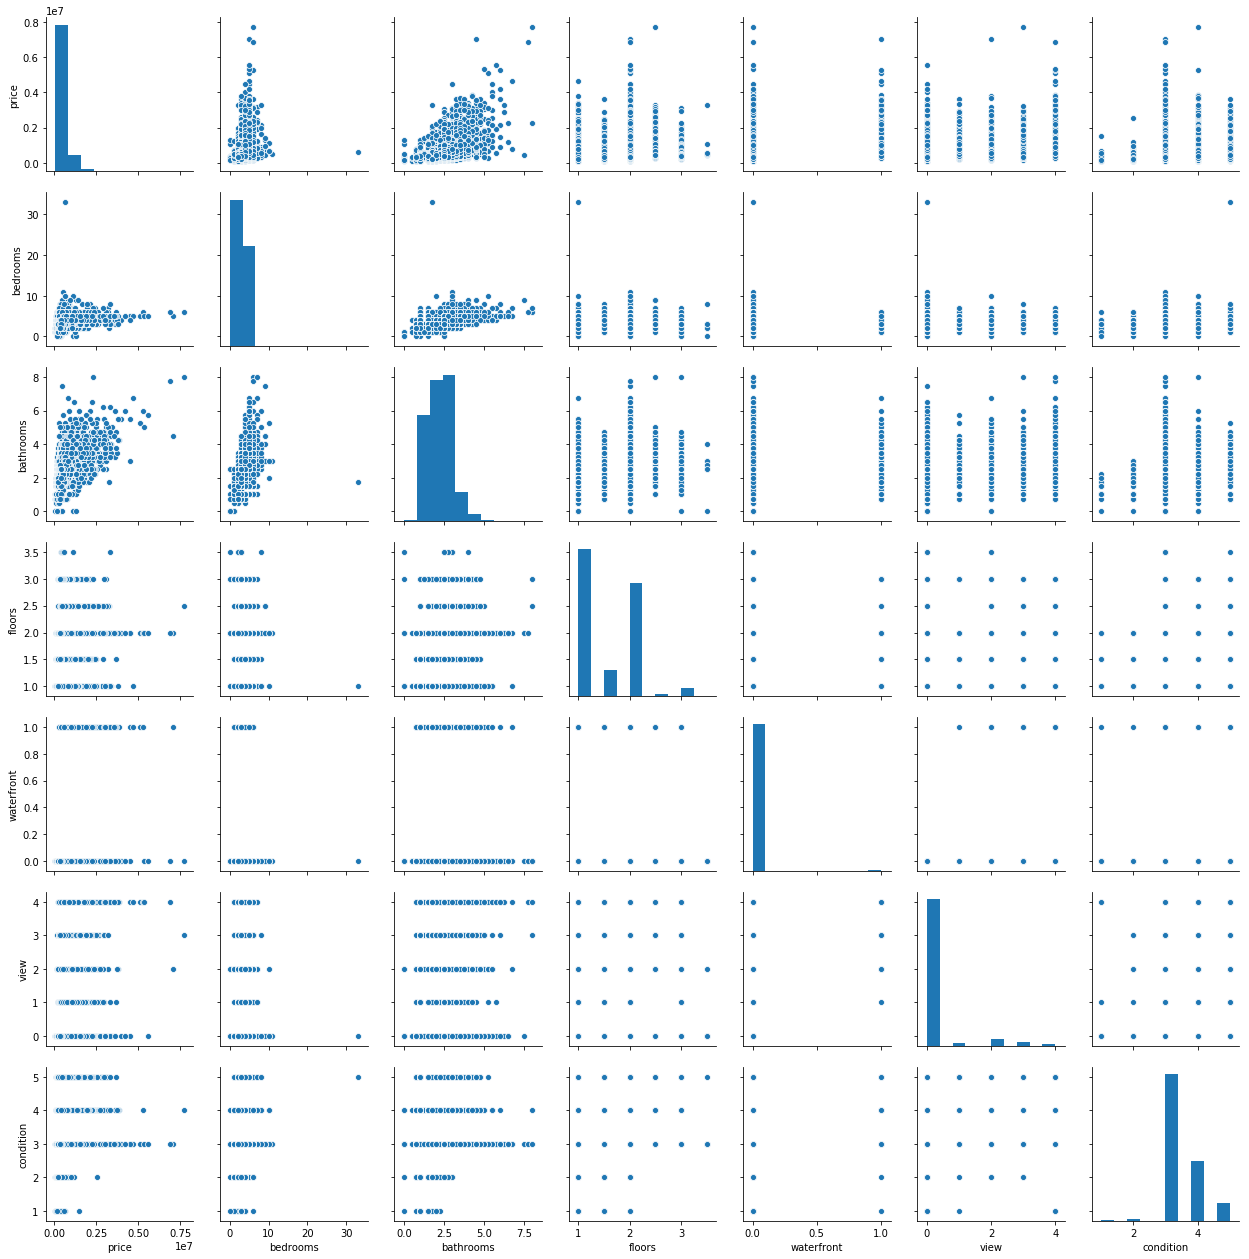

In [7]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition']])

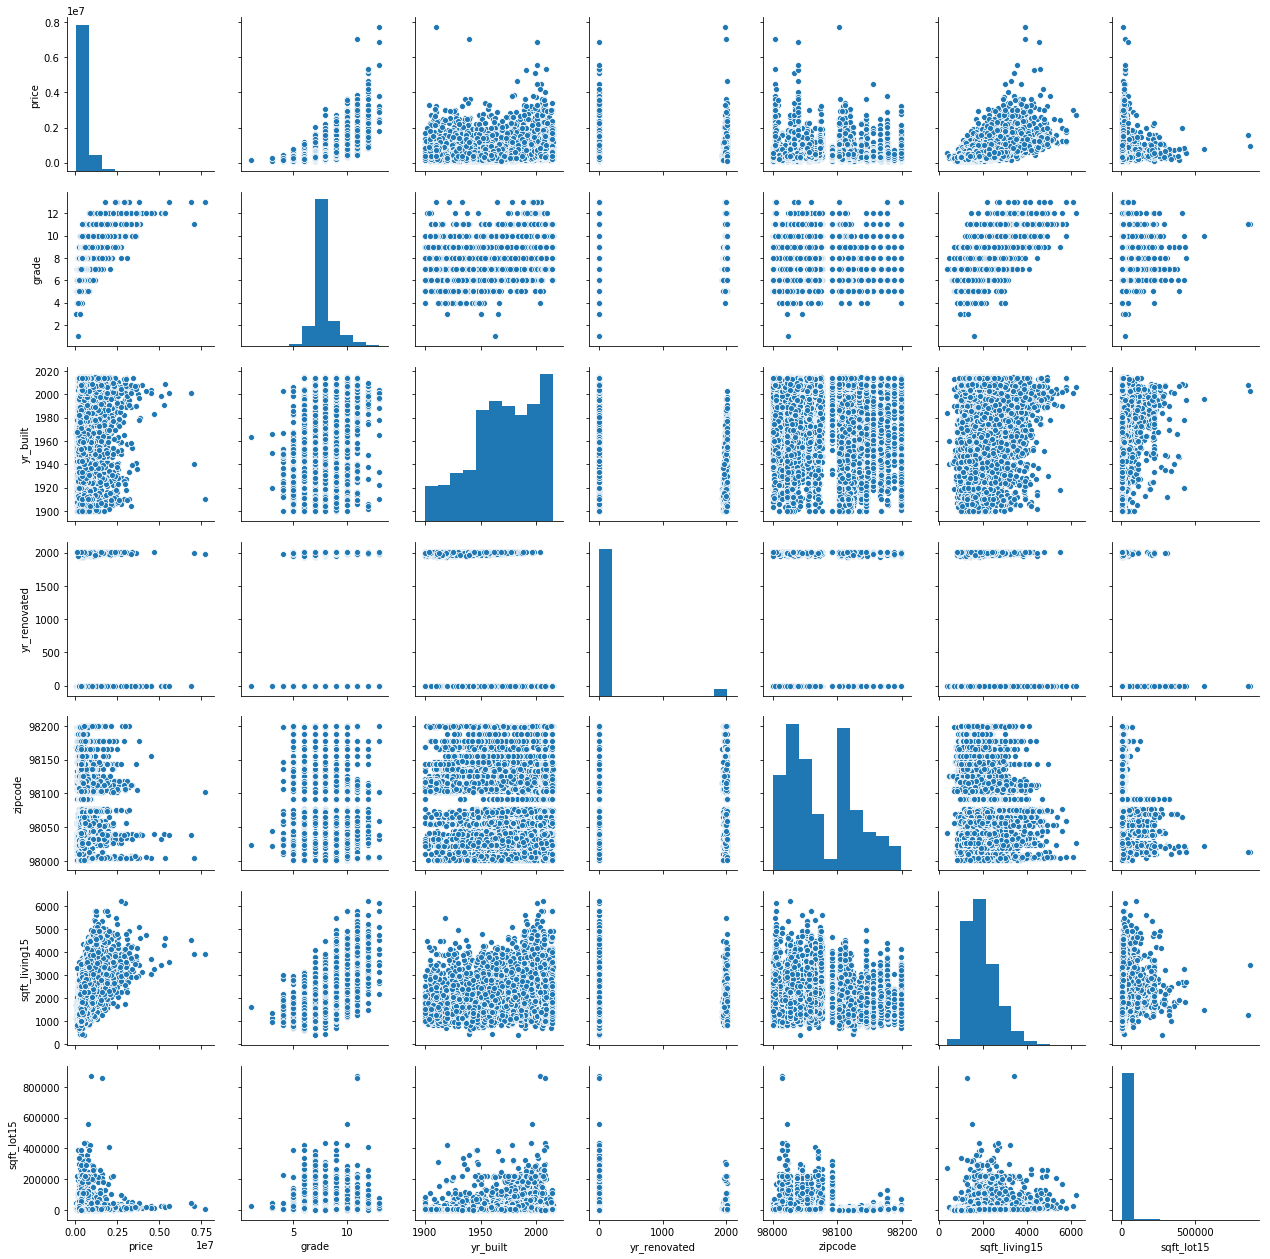

In [8]:
sns.pairplot(df[['price', 'grade','yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']])

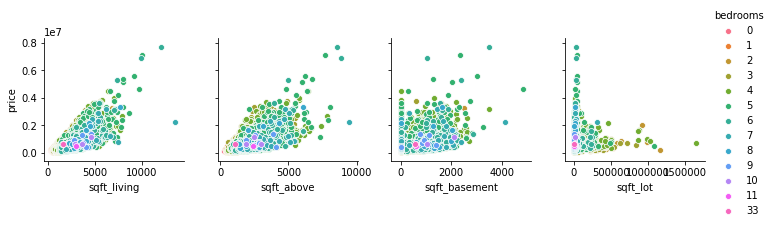

In [9]:
sns.pairplot(df, x_vars=['sqft_living','sqft_above', 'sqft_basement', 'sqft_lot'], y_vars=['price'], hue = 'bedrooms')

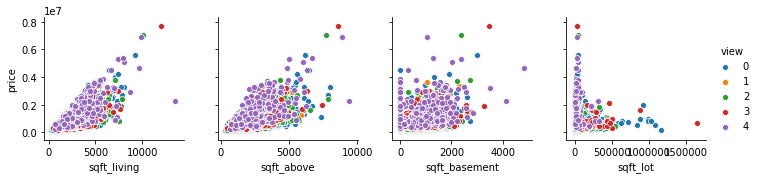

In [10]:
sns.pairplot(df, x_vars=['sqft_living','sqft_above', 'sqft_basement', 'sqft_lot'], y_vars=['price'], hue = 'view')

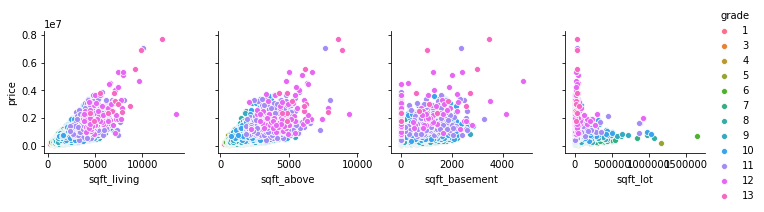

In [11]:
sns.pairplot(df, x_vars=['sqft_living','sqft_above', 'sqft_basement', 'sqft_lot'], y_vars=['price'], hue = 'grade')

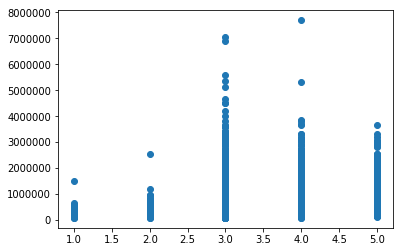

In [12]:
plt.scatter(df.condition, df.price)

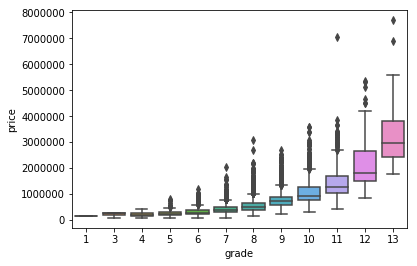

In [13]:
sns.boxplot(df.grade, df.price)

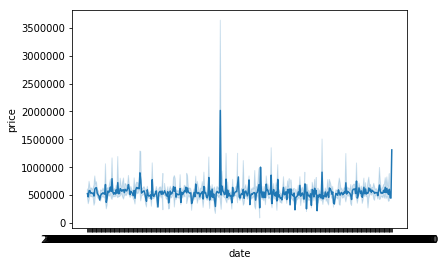

In [14]:
sns.lineplot(df.date, df.price, data = df)

In [15]:
effective_year = df.yr_renovated
effective_year = ((df.yr_built)*(df.yr_renovated==0)+(df.yr_renovated)*(df.yr_renovated!=0))

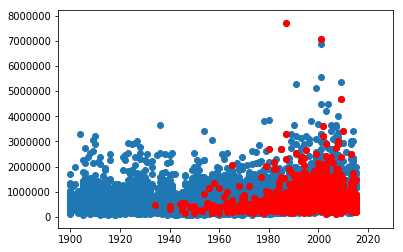

In [16]:
plt.xlim((1895,2030))
plt.scatter(effective_year, df.price)
plt.scatter(df.yr_renovated, df.price, color = 'red')

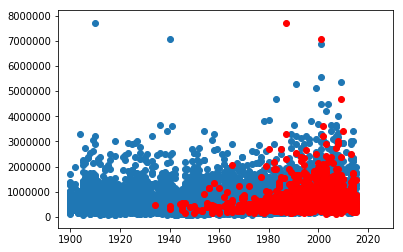

In [66]:
plt.xlim((1895,2030))
plt.scatter(df.yr_built, df.price)
plt.scatter(df.yr_renovated, df.price, color = 'red')

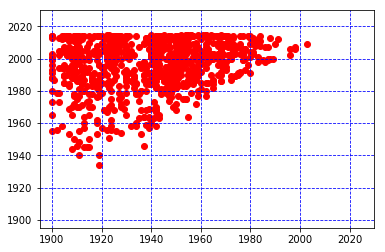

In [17]:
plt.xlim((1895,2030))
plt.ylim((1895,2030))
plt.scatter(df.yr_built, df.yr_renovated, color = 'red')
plt.grid(b=True, which='major', color='b', linestyle='--')

In [18]:
print(df.date.values)

['20141013T000000' '20141209T000000' '20150225T000000' ...
 '20140623T000000' '20150116T000000' '20141015T000000']


In [18]:
date_values = df.date.values
a = date_values[0].split('T')
#a = date_values[:0].values.split('T')
date_values = a[0]

date_values

'20141013'

In [20]:
#droping columns id, *date, sqft_living, sqft_lot, sqft_basement, view, lat, long,floors, etc. 
X = df.drop(['id', 'date','view','sqft_living','sqft_lot','lat', 'long','price'], axis =1)
y = df['price']

In [21]:
X.isnull().sum()
#X.isnull().any()

bedrooms         0
bathrooms        0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
X.isnull().any()

bedrooms         False
bathrooms        False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [23]:
X['basement'] = X['sqft_basement'].apply(lambda x: 1 if x!=0 else 0)

In [24]:
X.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,basement
0,3,1.00,1.0,0,3,7,1180,0,1955,0,98178,1340,5650,0
1,3,2.25,2.0,0,3,7,2170,400,1951,1991,98125,1690,7639,1
2,2,1.00,1.0,0,3,6,770,0,1933,0,98028,2720,8062,0
3,4,3.00,1.0,0,5,7,1050,910,1965,0,98136,1360,5000,1
4,3,2.00,1.0,0,3,8,1680,0,1987,0,98074,1800,7503,0


In [25]:
X=X.drop(['sqft_basement'],axis =1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)
X.shape

(21613, 13)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score is: ', r2_score(y_test, y_pred))
print('MSE is: ', mean_squared_error(y_test, y_pred))

R2 score is:  0.6349087662326982
MSE is:  51330350652.97828


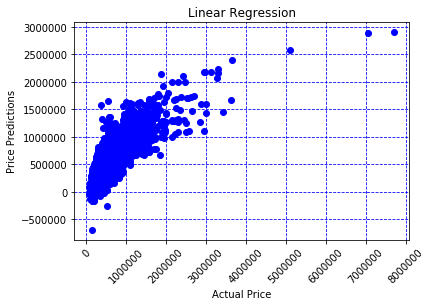

In [29]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Linear Regression')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# Encode categotical Zipcodes

In [30]:
# substitute zipcode with getdummies
X_zip_split=pd.get_dummies(X,columns=['zipcode'])

In [31]:
X_zip_split.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,0,3,7,1180,1955,0,1340,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,0,3,7,2170,1951,1991,1690,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,0,3,6,770,1933,0,2720,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0,5,7,1050,1965,0,1360,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0,3,8,1680,1987,0,1800,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_zip_split, y, test_size=0.25, random_state = 10)
X.shape

(21613, 13)

In [33]:
model_zip_split = LinearRegression()
model_zip_split.fit(X_train, y_train)

y_pred = model_zip_split.predict(X_test)

In [34]:
print('R2 score is: ', r2_score(y_test, y_pred))
print('MSE is: ', mean_squared_error(y_test, y_pred))

R2 score is:  0.7710543192910664
MSE is:  32188836609.43953


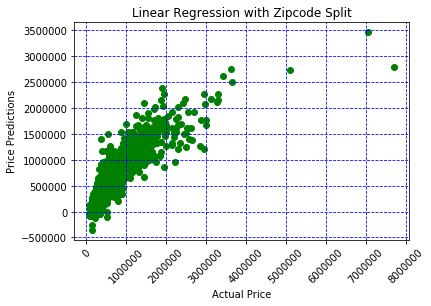

In [36]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Linear Regression with Zipcode Split')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# Run Polynomial Linear Regression withpot / with zipcodes encoded

In [37]:
poly=PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=10)

In [38]:
#Fit the polynominal transformed data and model using LinearRegression
PolyLRmodel = LinearRegression()
PolyLRmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
PolyLRscore = PolyLRmodel.score(X_test, y_test)
y_pred = PolyLRmodel.predict(X_test)
print('R2 score is: ', r2_score(y_test, y_pred))
print('Polynomial regression score is ',PolyLRscore)
print('Polynomial regression MSE is: ', mean_squared_error(y_test, y_pred))

R2 score is:  0.7584856342770705
Polynomial regression score is  0.7584856342770705
Polynomial regression MSE is:  33955942881.3651


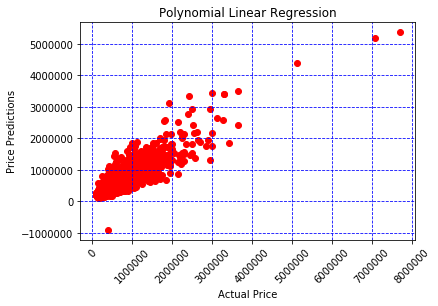

In [40]:
y_pred = PolyLRmodel.predict(X_test)
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Polynomial Linear Regression')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

In [41]:
#Now with the Zipcodes Split
X_zip_poly = poly.fit_transform(X_zip_split)
X_train, X_test, y_train, y_test = train_test_split(X_zip_poly, y, test_size=0.25, random_state=10)

In [42]:
PolyLRmodel_zip = LinearRegression().fit(X_train, y_train)

In [43]:
PolyLRscore = PolyLRmodel_zip.score(X_test, y_test)
y_pred = PolyLRmodel_zip.predict(X_test)
print('R2 score is: ', r2_score(y_test, y_pred))
print('Polynomial regression score is ',PolyLRscore)
print('Polynomial regression MSE is: ', mean_squared_error(y_test, y_pred))

R2 score is:  0.8695401438156781
Polynomial regression score is  0.8695401438156781
Polynomial regression MSE is:  18342128062.013508


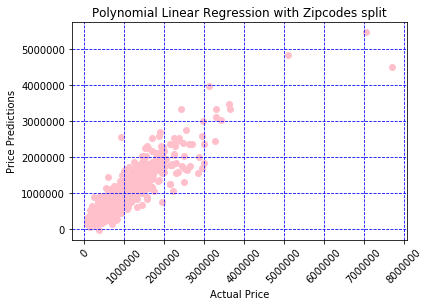

In [44]:
y_pred = PolyLRmodel_zip.predict(X_test)
plt.scatter(y_test, y_pred, color='pink')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Polynomial Linear Regression with Zipcodes split')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# KNearestNeighbor KNN

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)

In [46]:
#Find minimum error rate for k 1 to 100
r2_scores = []

for i in range (5,21):
    print(i)
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    r2_scores.append(r2score)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, ' R2 score')

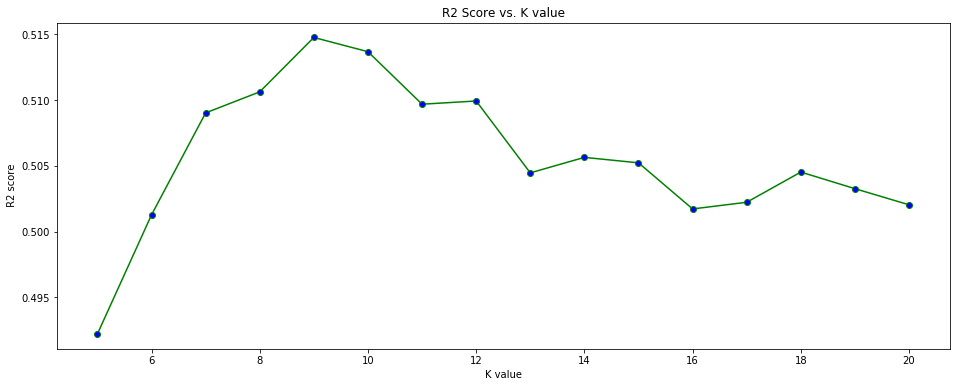

In [47]:
plt.figure(figsize=(16,6))
plt.plot(range(5,21), r2_scores, color = 'green', marker = 'o', markerfacecolor = 'blue')
plt.title('R2 Score vs. K value')
plt.xlabel('K value')
plt.ylabel(' R2 score')

In [48]:
knn_model = KNeighborsRegressor(n_neighbors = 9)

In [49]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

In [50]:
knn_score = knn_model.score(X_test, y_test)
y_pred = knn_model.predict(X_test)
print('R2 score is: ', r2_score(y_test, y_pred))
print('KNN Regression score is ',knn_score)
print('KNN Regression MSE is: ', mean_squared_error(y_test, y_pred))

R2 score is:  0.5147704966694255
KNN Regression score is  0.5147704966694255
KNN Regression MSE is:  68221305387.47436


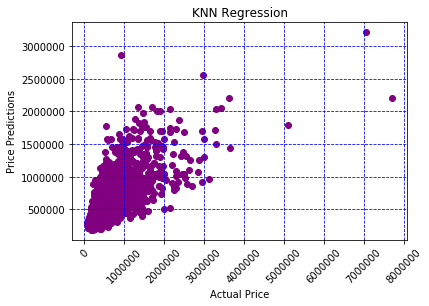

In [51]:
y_pred = knn_model.predict(X_test)
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('KNN Regression')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# Random Forest Regression

In [52]:
r2_scores = []

for n_est in [5, 10, 25, 50, 100]:
    RFR_model = RandomForestRegressor(n_estimators = n_est, random_state = 0).fit(X_train, y_train)
    #RFR_score = RFR_model.score(X_test, y_test)
    y_pred = RFR_model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    r2_scores.append(r2score)
    print('n ', n_est,'R2: ', r2score)
    #print('Decision Tree score is ',RFR_score)
    #print('Decsision Tree Regression MSE is: ', mean_squared_error(y_test, y_pred))

n  5 R2:  0.7513231596852452
n  10 R2:  0.7670820881028748
n  25 R2:  0.7869857316260561
n  50 R2:  0.7872863610237996
n  100 R2:  0.792070277810559


In [53]:
#RFR_model = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)
RFR_score = RFR_model.score(X_test, y_test)
y_pred = RFR_model.predict(X_test)
r2score = r2_score(y_test, y_pred)
print('n_estimators ', n_est,'R2 score is: ', r2score)
print('Decision Tree score is ',RFR_score)
print('Decsision Tree Regression MSE is: ', mean_squared_error(y_test, y_pred))

n_estimators  100 R2 score is:  0.792070277810559
Decision Tree score is  0.792070277810559
Decsision Tree Regression MSE is:  29234077852.340557


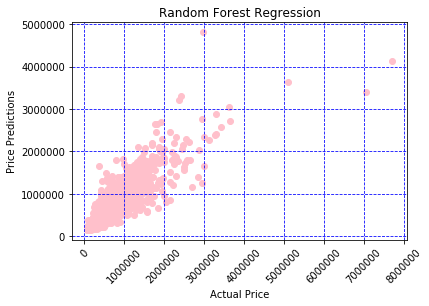

In [54]:
plt.scatter(y_test, y_pred, color='pink')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Random Forest Regression')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

In [56]:
#Now try with Zipcodes Split
X_train, X_test, y_train, y_test = train_test_split(X_zip_poly, y, test_size=0.25, random_state=10)
for n_est in [5, 10, 25, 50, 100]:
    RFR_model_zip = RandomForestRegressor(n_estimators = n_est, random_state = 0).fit(X_train, y_train)
    #RFR_score = RFR_model.score(X_test, y_test)
    y_pred = RFR_model_zip.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    r2_scores.append(r2score)
    print('n ', n_est,'R2: ', r2score)

n  5 R2:  0.7865197896978808
n  10 R2:  0.8003125133424714
n  25 R2:  0.8032065764321056
n  50 R2:  0.8057464762303765
n  100 R2:  0.8078337050466424


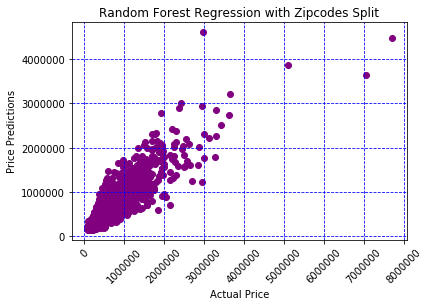

In [57]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Random Forest Regression with Zipcodes Split')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# Substitute LinearSVR

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
LinSVR_model = LinearSVR(random_state = 0).fit(X_train, y_train)
LinSVR_score = LinSVR_model.score(X_test, y_test)
y_pred = LinSVR_model.predict(X_test)
print('R2 score is: ', r2_score(y_test, y_pred))
print('Linear SVR score is ',LinSVR_score)
print('Linear SVR MSE is: ', mean_squared_error(y_test, y_pred))

R2 score is:  0.13292825555032384
Linear SVR score is  0.13292825555032384
Linear SVR MSE is:  121906779915.34286


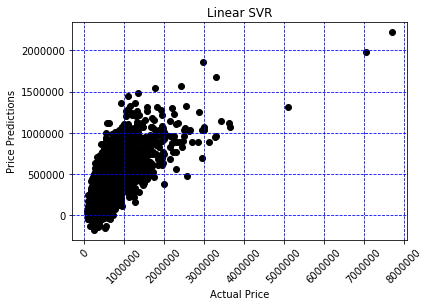

In [60]:
plt.scatter(y_test, y_pred, color='black')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('Linear SVR')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# Decision Tree

In [ ]:
#DTR_model = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
#DTR_score = DTR_model.score(X_test, y_test)
#print('Decision Tree score is ',DTR_score)
#print('Decsision Tree Regression MSE is: ', mean_squared_error(y_test, y_pred))

# SVR Linear Kernel

In [74]:
SVR_model = SVR(kernel='linear', tol = 0.001, max_iter = 300000).fit(X_train, y_train)

In [75]:
y_predSVR = SVR_model.predict(X_test)
print('R2 score is: ', r2_score(y_test, y_predSVR))
print('MSE is: ', mean_squared_error(y_test, y_predSVR))

R2 score is:  0.43503188635302614
MSE is:  79432231450.76825


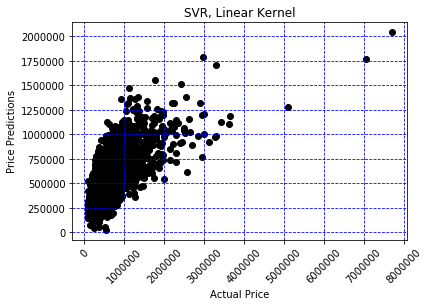

In [76]:
plt.scatter(y_test, y_predSVR, color='black')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('SVR, Linear Kernel')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')

# SVR Poly Kernel

In [63]:
PolySVR_model = SVR(kernel='poly', degree = 2, tol = 0.1, max_iter = 300000).fit(X_train, y_train)

In [64]:
y_predPolySVR = PolySVR_model.predict(X_test)
print('R2 score is: ', r2_score(y_test, y_predPolySVR))
print('MSE is: ', mean_squared_error(y_test, y_predPolySVR))

R2 score is:  -40771.58652495567
MSE is:  5732460737988590.0


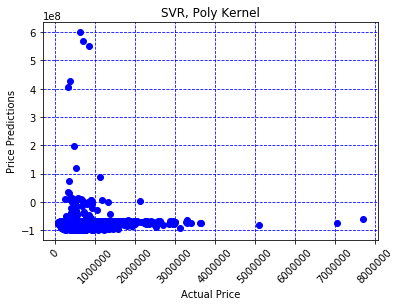

In [65]:
plt.scatter(y_test, y_predPolySVR, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Price Predictions')
plt.title('SVR, Poly Kernel')
plt.xticks(rotation = 45)
plt.grid(b=True, which='major', color='b', linestyle='--')